In [412]:
# imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings

In [413]:
# define the path where the data is persisted
STORAGE_PATH = "../../persisted_data/feather/{}.feather"

In [540]:
# load some stock data
value_stock = pd.read_feather(STORAGE_PATH.format("IBM_normalized"))
growth_stock = pd.read_feather(STORAGE_PATH.format("AAPL_normalized"))

In [534]:
def regulating_speculator(stock, indicators, min_position, max_position):
    size = stock.shape[0]
    # a high position of the price within an indicator range
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        mean_features = np.nanmean(stock[indicators], axis=1)
        rule = np.where(np.isnan(mean_features), 0, mean_features)
        position = np.clip(1 - rule[:size - 1], min_position , max_position)
        # calculate the price changes considering the chosen position
        price_changes = np.diff(stock["current_price"]) / stock["current_price"][:size - 1]
        position_changes = position * price_changes

        # update the value of the portfolio iteratively
        position_total = np.zeros(size) + stock["current_price"][0]
        for index in range(size - 1):
            position_total[index + 1] = position_total[index]  * (1 + position_changes[index])
    
        return position, position_total


In [535]:
def plot_performance(strategies):
    plt.figure(figsize=(15,8))
    for name, performance in strategies.items():
        plt.plot(np.arange(len(performance)), performance, label=name)
    
    plt.title("Performance comparison of multiple portfolio strategies")
    plt.legend()
    plt.xlabel("Trading days")
    plt.ylabel("Price/Portfolio value")
    plt.show()

0.7988095497316141
0.7781678878765494
0.7694744002655638


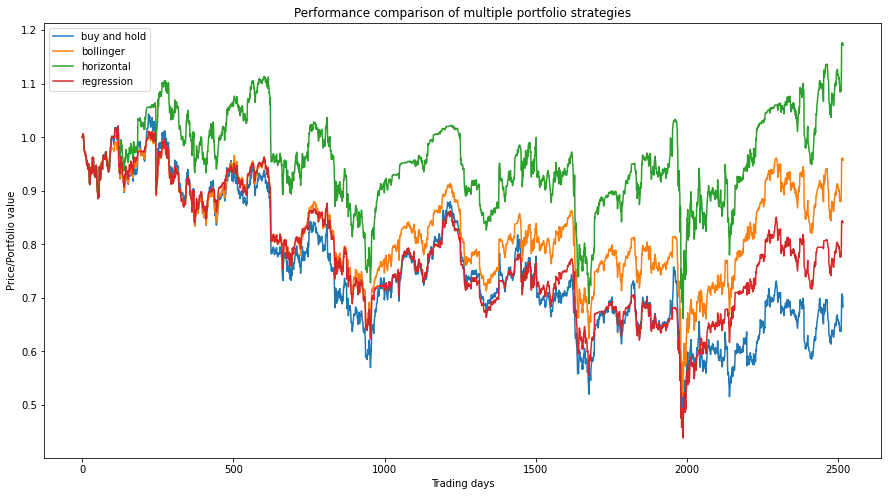

In [536]:
# compare the buy and hold to the bollinger band strategy
indicators_bollinger = ["bollinger_position20_2","bollinger_position50_2"]
indicators_horizontal = ["horizontal_position100", "horizontal_position200"]
indicators_regression = ["regression_position100", "regression_position200"]

strategy_bollinger, strategy_performance_bollinger = regulating_speculator(value_stock, indicators_bollinger, 0, 1)
print(strategy_bollinger.mean())

strategy_horizontal, strategy_performance_horizontal = regulating_speculator(value_stock, indicators_horizontal, 0, 1)
print(strategy_horizontal.mean())

strategy_regression, strategy_performance_regression = regulating_speculator(value_stock, indicators_regression, 0, 1)
print(strategy_regression.mean())
performances = {
    "buy and hold": value_stock["current_price"],
    "bollinger": strategy_performance_bollinger,
    "horizontal": strategy_performance_horizontal,
    "regression": strategy_performance_regression
    
}

plot_performance(performances)

0.7324999435588248
0.6443316469261372
0.7854387312336472


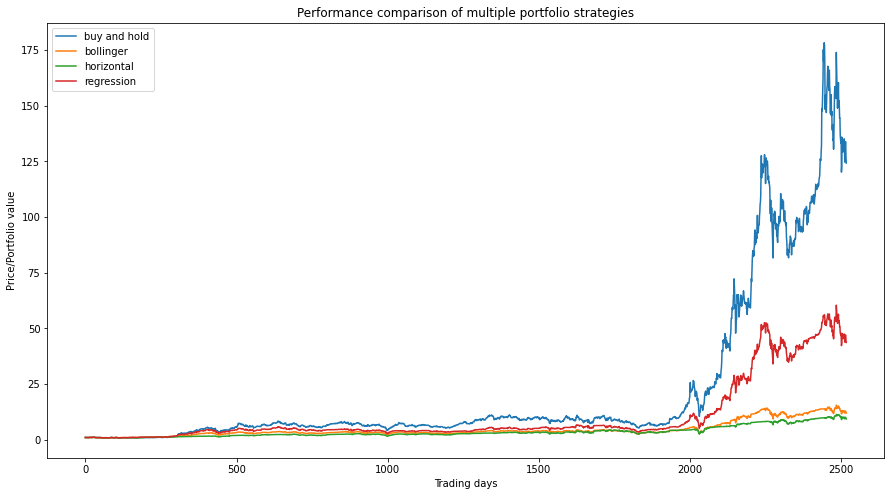

In [539]:
# compare the buy and hold to the bollinger band strategy
indicators_bollinger = ["bollinger_position20_2","bollinger_position50_2"]
indicators_horizontal = ["horizontal_position100", "horizontal_position200"]
indicators_regression = ["regression_position100", "regression_position200"]

strategy_bollinger, strategy_performance_bollinger = regulating_speculator(growth_stock, indicators_bollinger, 0, 1)
print(strategy_bollinger.mean())

strategy_horizontal, strategy_performance_horizontal = regulating_speculator(growth_stock, indicators_horizontal, 0, 1)
print(strategy_horizontal.mean())

strategy_regression, strategy_performance_regression = regulating_speculator(growth_stock, indicators_regression, 0, 1)
print(strategy_regression.mean())
performances = {
    "buy and hold": growth_stock["current_price"],
    "bollinger": strategy_performance_bollinger,
    "horizontal": strategy_performance_horizontal,
    "regression": strategy_performance_regression
    
}

plot_performance(performances)